In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orders = pd.read_csv('data/orders.csv' )
order_products_train = pd.read_csv('data/order_products__train.csv')
order_products_prior = pd.read_csv('data/order_products__prior.csv')
products = pd.read_csv('data/products.csv')
aisles = pd.read_csv('data/aisles.csv')
departments = pd.read_csv('data/departments.csv')

In [3]:
print(orders.shape)
orders.head(5)

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
orders.sort_values('order_id',ascending=True)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1868044,1,112108,train,4,4,10,9.0
3355525,2,202279,prior,3,5,9,8.0
3417191,3,205970,prior,16,5,17,12.0
2958007,4,178520,prior,36,1,9,7.0
2593373,5,156122,prior,42,6,16,9.0
...,...,...,...,...,...,...,...
1809968,3421079,108687,prior,6,1,13,0.0
877324,3421080,52726,prior,2,1,11,2.0
1949724,3421081,117076,prior,1,3,11,NaN
2903252,3421082,175185,prior,23,2,18,4.0


In [5]:
orders.tail(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0
3421082,272231,206209,train,14,6,14,30.0


In [6]:
print(order_products_prior.shape)
order_products_prior.head(10)

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [7]:
print(order_products_train.shape)
order_products_train.head(10)

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [8]:
print(products.shape)
products.head(5)

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
print(aisles.shape)
aisles.head(5)

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [10]:
print(departments.shape)
departments.head(5)

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


## EDA

In [11]:
# 우선 eval_set 을 기준으로 prior, train, test의 개수를 알아보자

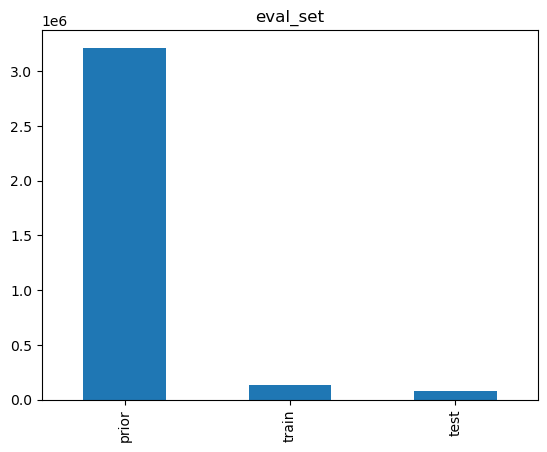

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64


In [12]:
orders_eval = orders['eval_set'].value_counts()
orders_eval.plot(kind='bar', title='eval_set')
plt.show()
print(orders_eval)

In [13]:
#구매자의 마지막 주문이 train과 test로 나누어지므로, train과 test의 값을 보면 각 구매자의 최대 구매 횟수(order_number)를 알 수 있다.
order_count = orders[(orders['eval_set']=='train')|(orders['eval_set']=='test')]
order_count

#order_count['order_number'].plot(kind='bar')
#plt.show()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
49,2196797,5,train,5,0,11,6.0
...,...,...,...,...,...,...,...
3420933,1716008,206205,train,4,1,16,10.0
3421001,1043943,206206,test,68,0,20,0.0
3421018,2821651,206207,test,17,2,13,14.0
3421068,803273,206208,test,50,5,11,4.0


In [14]:
#내림차순 정렬하기
order_count.sort_values(by='order_number', ascending=False)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
2531874,2778366,152340,test,100,6,7,2.0
3078421,1682581,185641,train,100,2,12,2.0
3076273,2837266,185524,test,100,3,10,0.0
1359026,912861,81678,train,100,2,0,0.0
1179942,864328,70922,test,100,5,15,1.0
...,...,...,...,...,...,...,...
215960,1034135,13046,train,4,3,16,30.0
1167894,2025565,70208,train,4,4,13,24.0
1856454,1571988,111440,train,4,0,14,3.0
526810,1118851,31762,train,4,1,11,7.0


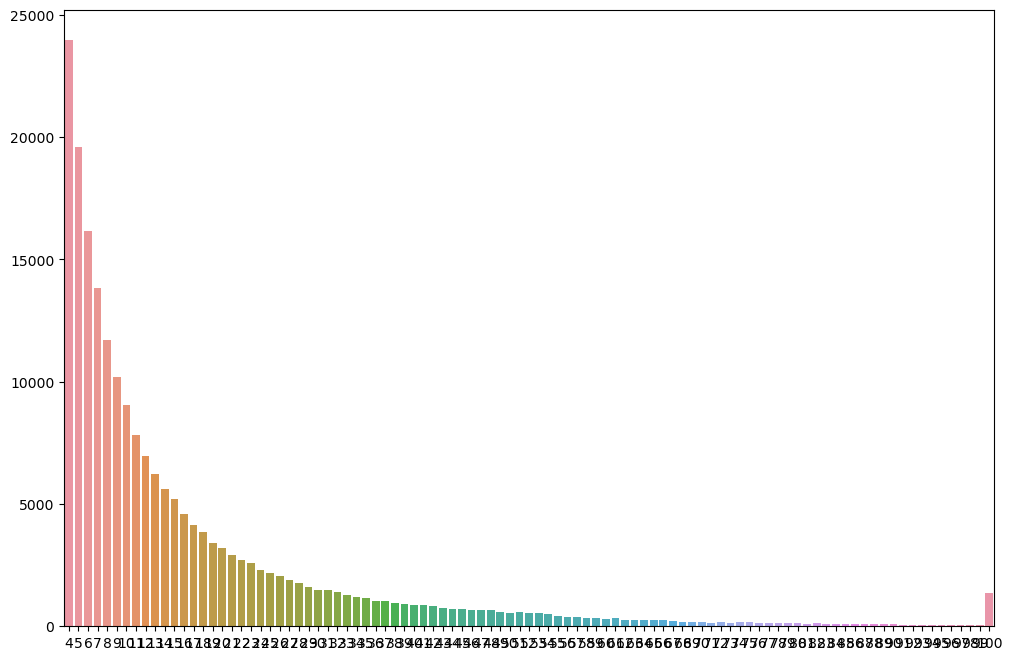

In [15]:
# 주문횟수 별 사용자 파악해보자
temp = order_count.groupby('user_id')['order_number'].agg(np.max).reset_index()
temp = temp['order_number'].value_counts()

plt.figure(figsize=(12,8))
sns.barplot(temp.index, temp.values)
plt.show()

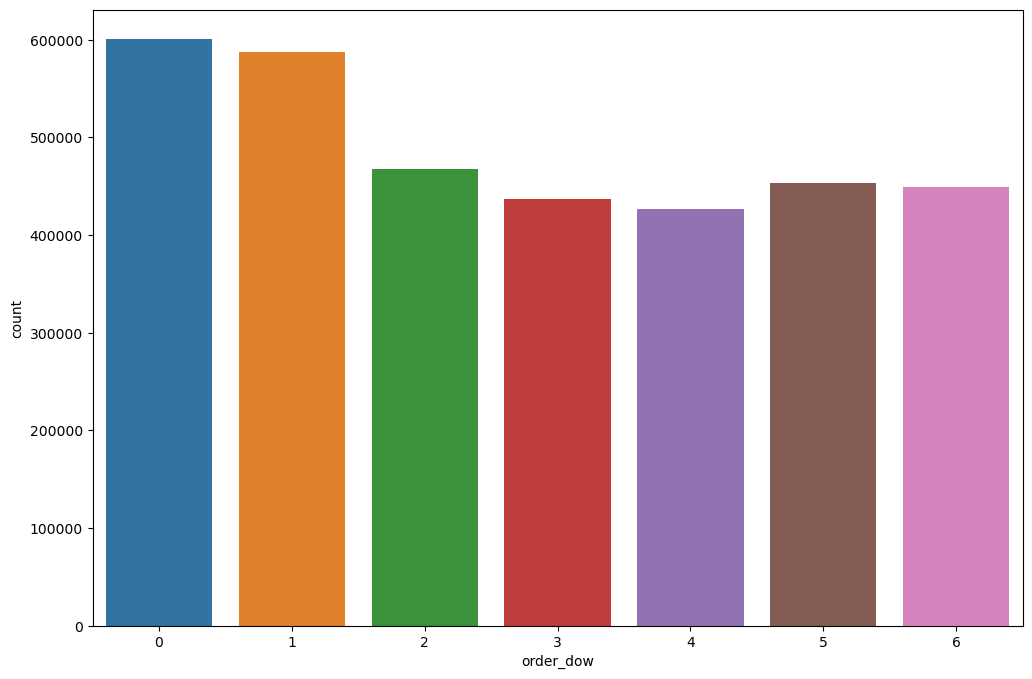

In [16]:
#요일 별 구매빈도수
plt.figure(figsize=(12,8))
sns.countplot(x='order_dow', data=orders)
plt.show()

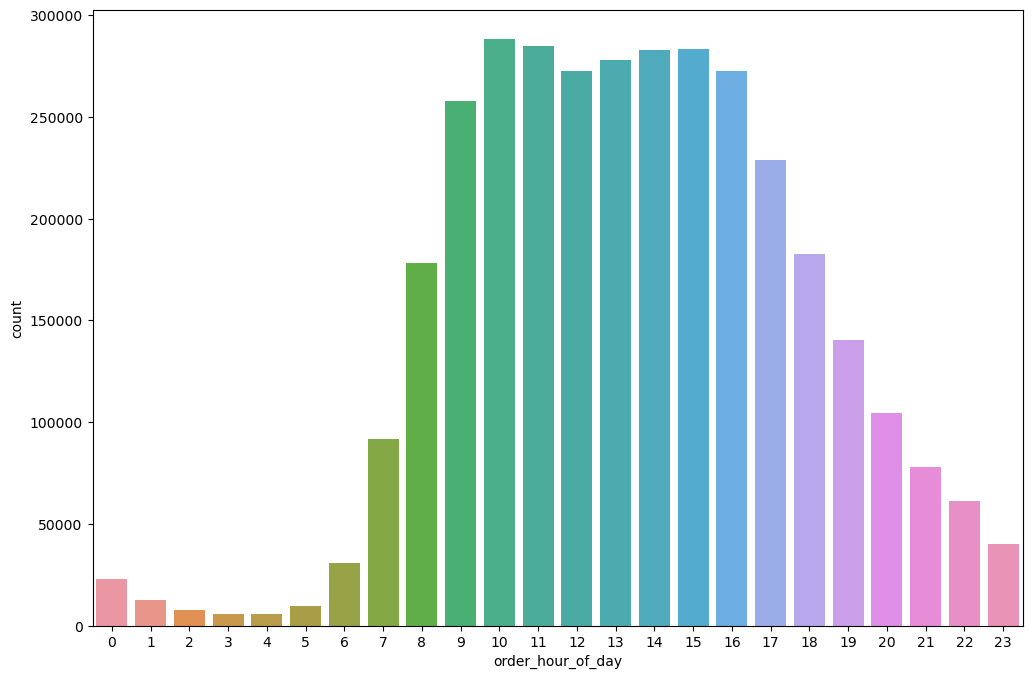

In [17]:
#시간 별 구매빈도수
plt.figure(figsize=(12,8))
sns.countplot(x='order_hour_of_day', data=orders)
plt.show()

C:\Users\tkdgu\AppData\Local\Temp\ipykernel_1500\804246314.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  day = day.pivot('order_dow', 'order_hour_of_day','order_number')


<AxesSubplot: xlabel='order_hour_of_day', ylabel='order_dow'>

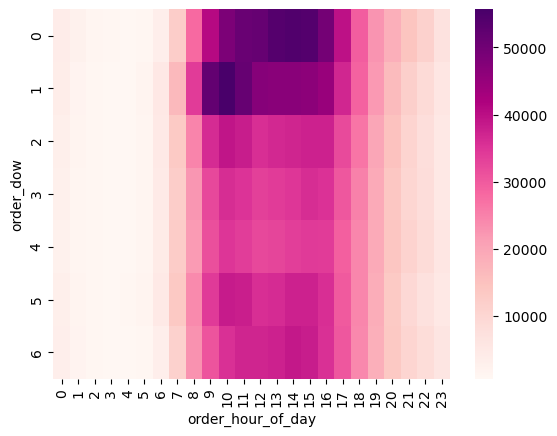

In [18]:
day = orders.groupby(['order_dow', 'order_hour_of_day'])['order_number'].aggregate('count').reset_index()
day = day.pivot('order_dow', 'order_hour_of_day','order_number')

sns.heatmap(day, cmap='RdPu')

In [19]:
orders.sort_values('order_id', ascending=True)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1868044,1,112108,train,4,4,10,9.0
3355525,2,202279,prior,3,5,9,8.0
3417191,3,205970,prior,16,5,17,12.0
2958007,4,178520,prior,36,1,9,7.0
2593373,5,156122,prior,42,6,16,9.0
...,...,...,...,...,...,...,...
1809968,3421079,108687,prior,6,1,13,0.0
877324,3421080,52726,prior,2,1,11,2.0
1949724,3421081,117076,prior,1,3,11,NaN
2903252,3421082,175185,prior,23,2,18,4.0


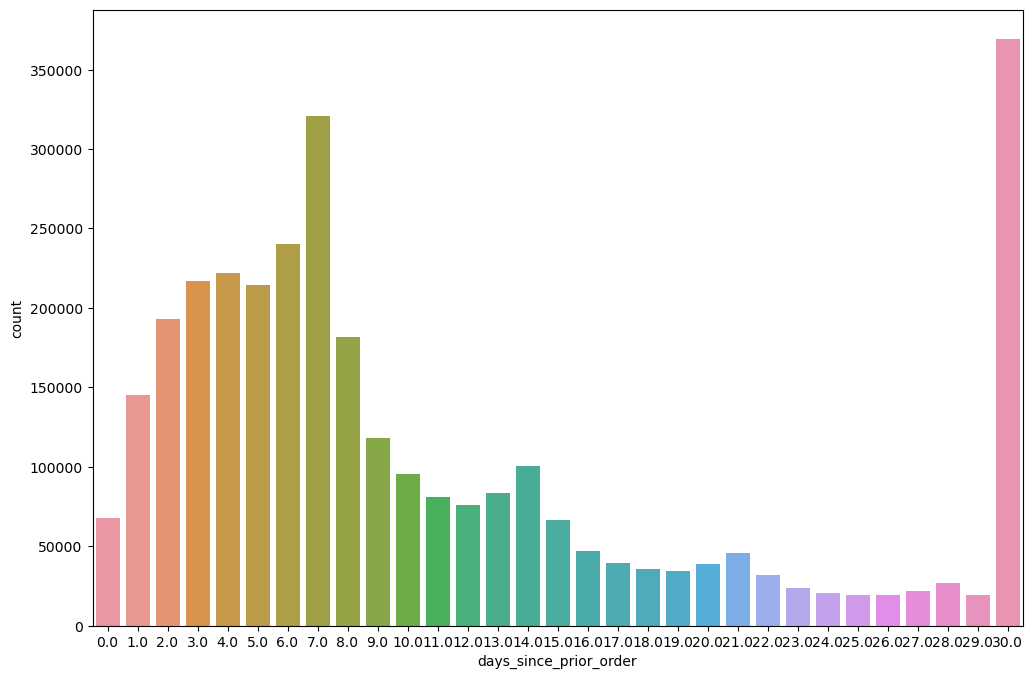

In [20]:
#재구매 날짜별 빈도수
plt.figure(figsize=(12,8))
sns.countplot(x='days_since_prior_order', data=orders)
plt.show()

In [21]:
#order_product에 해당하는 products를 추가한 후, aisles과 departments를 추가한다

order_products_prior = pd.merge(order_products_prior, products, on='product_id', how='left')
order_products_prior = pd.merge(order_products_prior, aisles, on='aisle_id', how='left')
order_products_prior = pd.merge(order_products_prior, departments, on='department_id', how='left')
order_products_train = pd.merge(order_products_train, products, on='product_id', how='left')
order_products_train = pd.merge(order_products_train, aisles, on='aisle_id', how='left')
order_products_train = pd.merge(order_products_train, departments, on='department_id', how='left')

In [22]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [23]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods


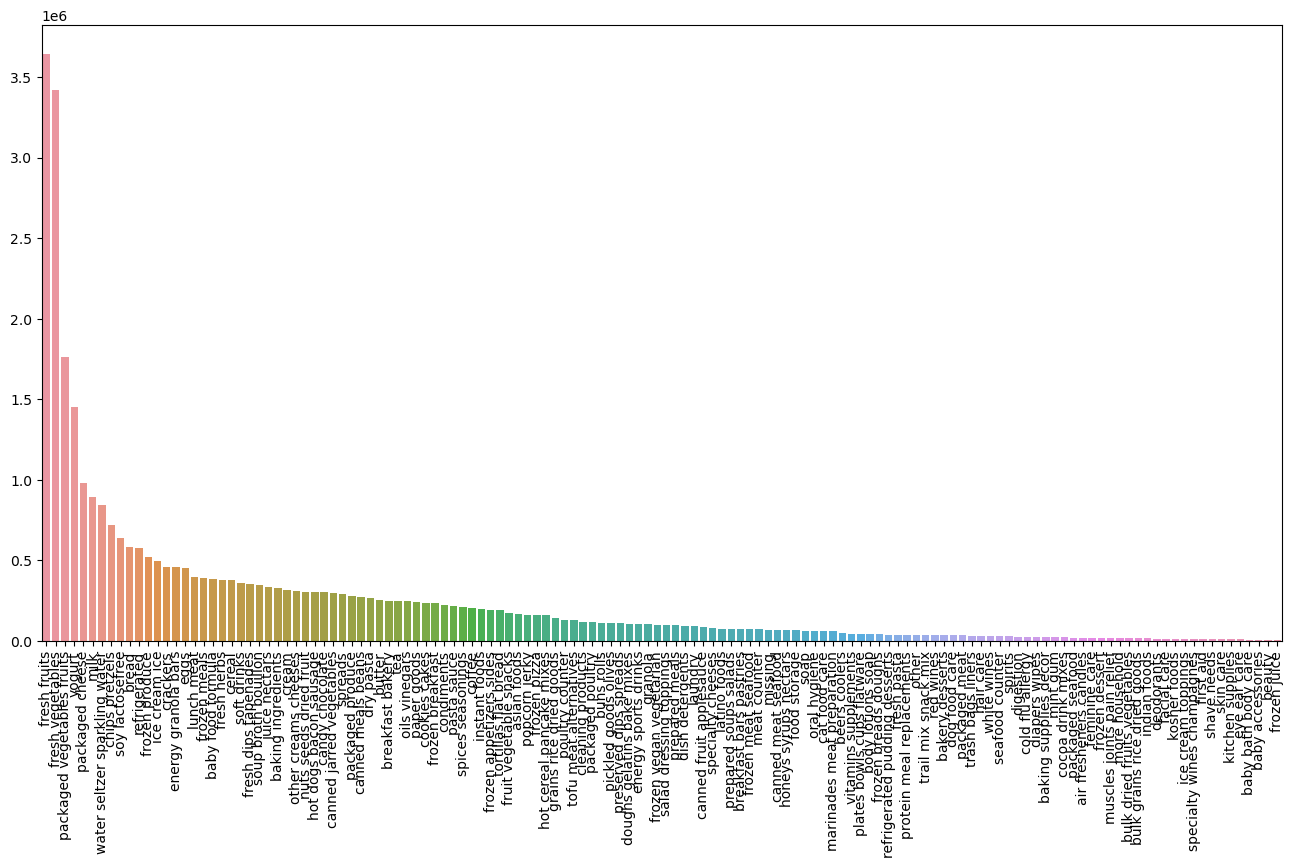

In [24]:
#prior에 대한 정보를 plot
temp = order_products_prior['aisle'].value_counts()
plt.figure(figsize=(16,8))
sns.barplot(temp.index, temp.values)
plt.xticks(rotation='vertical')
plt.show()

In [25]:

"""plt.figure(figsize=(10,10))
temp = order_products_prior['product_name'].value_counts()
labels = (np.array(temp.index))
sizes = (np.array((temp / temp.sum())*100))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()"""  # 품목 plot은 버리자,,,,

"plt.figure(figsize=(10,10))\ntemp = order_products_prior['product_name'].value_counts()\nlabels = (np.array(temp.index))\nsizes = (np.array((temp / temp.sum())*100))\nplt.pie(sizes, labels=labels, autopct='%1.1f%%')\nplt.show()"

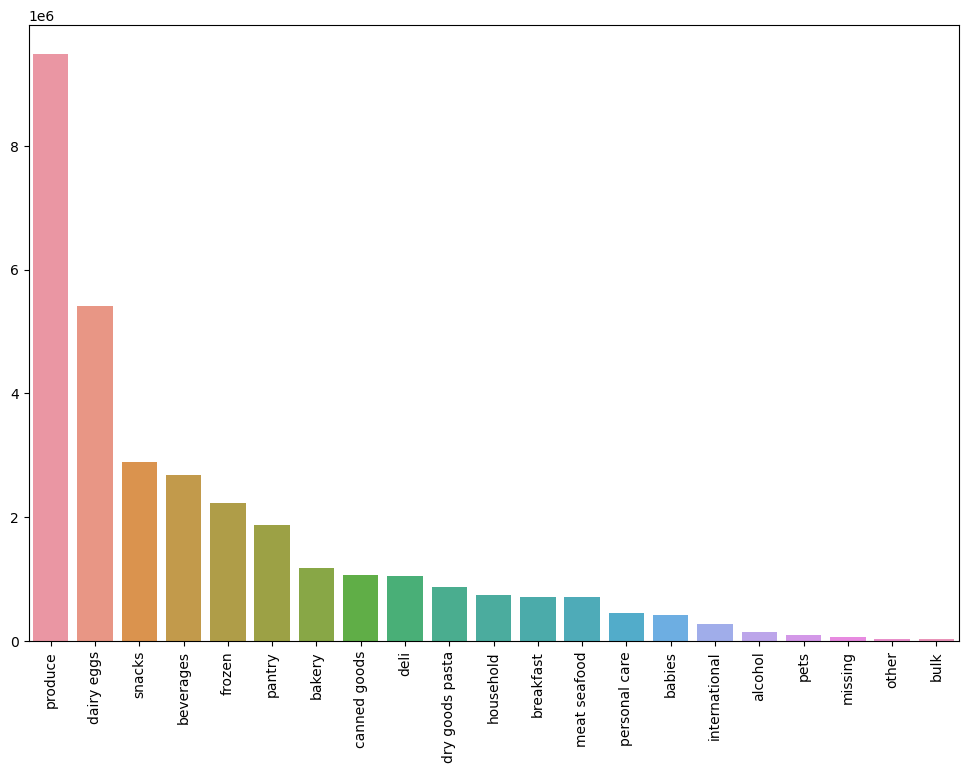

In [26]:
temp = order_products_prior['department'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(temp.index, temp.values)
plt.xticks(rotation='vertical')
plt.show()

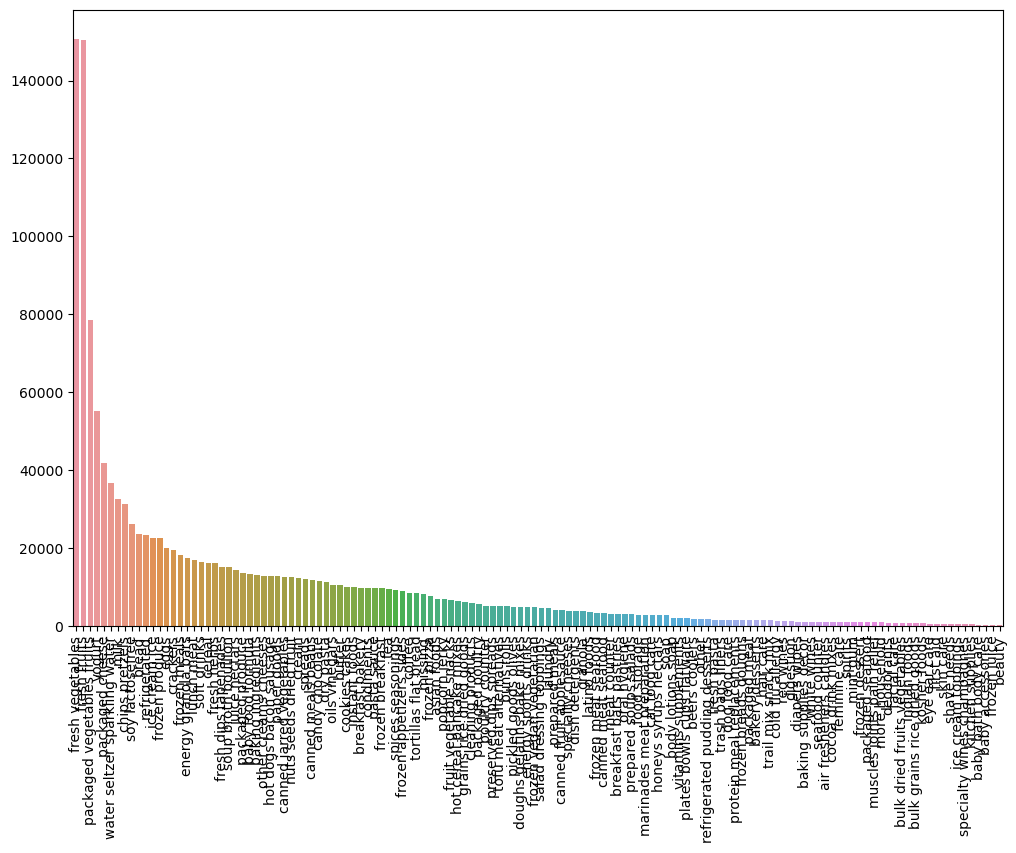

In [27]:
#train에 대해서 plot
temp = order_products_train['aisle'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(temp.index, temp.values)
plt.xticks(rotation='vertical')
plt.show()

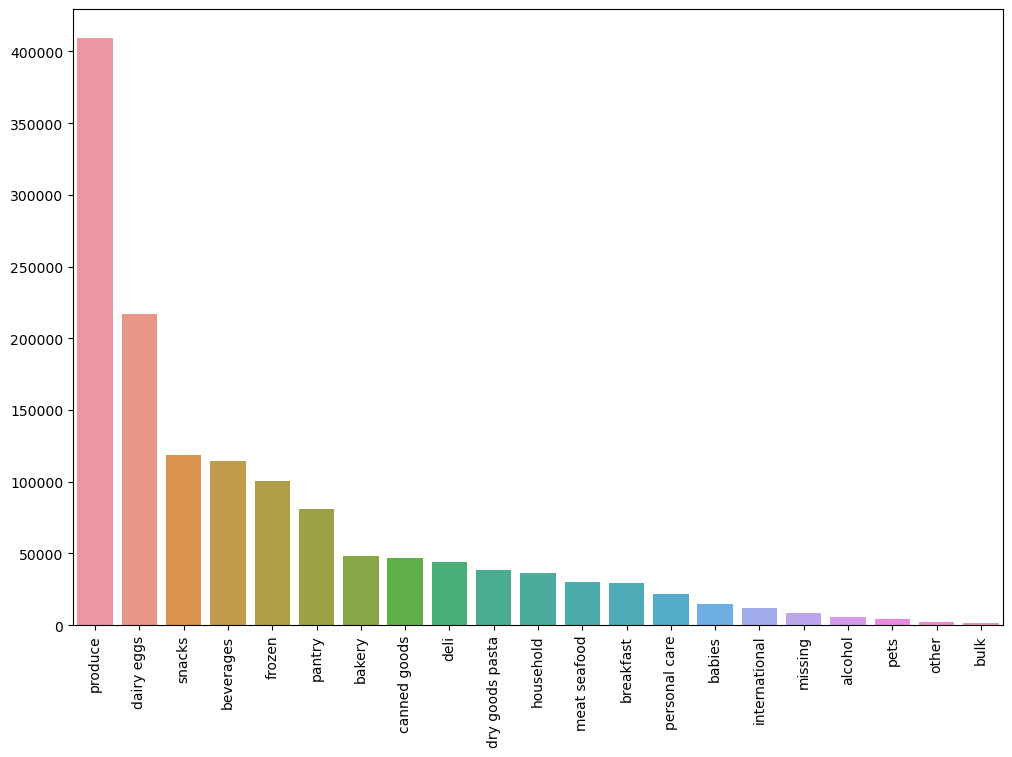

In [28]:
temp = order_products_train['department'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(temp.index, temp.values)
plt.xticks(rotation='vertical')
plt.show()

### Association Rules(Apriori Algorithm)

In [29]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [30]:
#Merge1 = Prior and Orders
merge1 = pd.merge(order_products_prior, orders, on='order_id')

merge1 = merge1.drop(['product_name','aisle_id', 'department_id', 'aisle', 'department'], axis='columns')
merge1.head(5)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [31]:
#Merge2 = Product&aisle&department
pro_ais = pd.merge(products, aisles, on = 'aisle_id')
merge2 = pd.merge(pro_ais, departments, on = 'department_id')
merge2.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes,snacks
2,102,Danish Butter Cookies,61,19,cookies cakes,snacks
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes,snacks
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes,snacks


In [32]:
combined_order = pd.merge(merge1, merge2, on = 'product_id').reset_index(drop=True)
combined_order.head(5)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,26,33120,5,0,153404,prior,2,0,16,7.0,Organic Egg Whites,86,16,eggs,dairy eggs
2,120,33120,13,0,23750,prior,11,6,8,10.0,Organic Egg Whites,86,16,eggs,dairy eggs
3,327,33120,5,1,58707,prior,21,6,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
4,390,33120,28,1,166654,prior,48,0,12,9.0,Organic Egg Whites,86,16,eggs,dairy eggs


In [43]:
np.random.seed(942)
tmp = combined_order.sample(n=1000)[['user_id','aisle']]
basket = pd.crosstab(tmp['user_id'], tmp['aisle']).astype('bool').astype('int')

In [44]:
basket = basket.reset_index(drop=True)
basket.head(5)

aisle,asian foods,baby food formula,bakery desserts,baking ingredients,body lotions soap,bread,breakfast bakery,breakfast bars pastries,bulk grains rice dried goods,buns rolls,...,spirits,spreads,tea,tofu meat alternatives,tortillas flat bread,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
frequent_itemsets = apriori(basket, min_support = 0.00002, use_colnames=True).sort_values('support', ascending=False)

frequent_itemsets.head(20)

C:\Users\tkdgu\anaconda3\envs\kaggle\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
36,0.106963,(fresh fruits)
39,0.101917,(fresh vegetables)
75,0.062563,(packaged vegetables fruits)
106,0.059536,(yogurt)
62,0.025227,(milk)
93,0.022200,(soy lactosefree)
5,0.021191,(bread)
31,0.020182,(eggs)
47,0.019173,(frozen produce)
17,0.019173,(chips pretzels)


In [46]:
#같이 구매한 항목의 개수 열을 추가
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.head(20)

,support,itemsets,length
36,0.106963,(fresh fruits),1
39,0.101917,(fresh vegetables),1
75,0.062563,(packaged vegetables fruits),1
106,0.059536,(yogurt),1
62,0.025227,(milk),1
93,0.022200,(soy lactosefree),1
5,0.021191,(bread),1
31,0.020182,(eggs),1
47,0.019173,(frozen produce),1
17,0.019173,(chips pretzels),1


In [47]:
# confidence(신뢰도)에 의한 연관성 판단하기
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(frozen vegan vegetarian),(paper goods),0.002018,0.010091,0.001009,0.5,49.55,0.000989,1.979818


In [48]:
# Lift(향상도)에 의한 연관성 판단하기
# 값이 1이라면 독립을 의미 / 값이 2라면 두 사건이 독립이라는 가정에서 긍정적인 연관관계를 나타냄
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(frozen vegan vegetarian),(paper goods),0.002018,0.010091,0.001009,0.500000,49.550000,0.000989,1.979818
1,(paper goods),(frozen vegan vegetarian),0.010091,0.002018,0.001009,0.100000,49.550000,0.000989,1.108869
2,(crackers),(cream),0.016145,0.008073,0.001009,0.062500,7.742188,0.000879,1.058056
3,(cream),(crackers),0.008073,0.016145,0.001009,0.125000,7.742188,0.000879,1.124405
4,(frozen appetizers sides),(bakery desserts),0.006054,0.003027,0.001009,0.166667,55.055556,0.000991,1.196367


In [49]:
#apriori 에서 보완된 FP-growth Algorithm을 적용시켜보자
from mlxtend.frequent_patterns import fpgrowth
frequent_itemsets_fp = fpgrowth(basket, min_support = 0.00002, use_colnames=True).sort_values('support', ascending=False)

frequent_itemsets_fp.head(20)


C:\Users\tkdgu\anaconda3\envs\kaggle\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
1,0.106963,(fresh fruits)
14,0.101917,(fresh vegetables)
9,0.062563,(packaged vegetables fruits)
7,0.059536,(yogurt)
5,0.025227,(milk)
2,0.022200,(soy lactosefree)
45,0.021191,(bread)
20,0.020182,(eggs)
29,0.019173,(packaged cheese)
15,0.019173,(ice cream ice)


In [50]:
#같이 구매한 항목의 개수 열을 추가
frequent_itemsets_fp['length'] = frequent_itemsets_fp['itemsets'].apply(lambda x: len(x))
frequent_itemsets_fp.head(20)

,support,itemsets,length
1,0.106963,(fresh fruits),1
14,0.101917,(fresh vegetables),1
9,0.062563,(packaged vegetables fruits),1
7,0.059536,(yogurt),1
5,0.025227,(milk),1
2,0.022200,(soy lactosefree),1
45,0.021191,(bread),1
20,0.020182,(eggs),1
29,0.019173,(packaged cheese),1
15,0.019173,(ice cream ice),1


In [51]:
# confidence(신뢰도)에 의한 연관성 판단하기
rules_fp = association_rules(frequent_itemsets_fp, metric='confidence', min_threshold=0.5)
rules_fp.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(frozen vegan vegetarian),(paper goods),0.002018,0.010091,0.001009,0.5,49.55,0.000989,1.979818


In [54]:
# Lift(향상도)에 의한 연관성 판단하기
# 값이 1이라면 독립을 의미 / 값이 2라면 두 사건이 독립이라는 가정에서 긍정적인 연관관계를 나타냄
rules_fp = association_rules(frequent_itemsets_fp, metric='lift', min_threshold=1)
rules_fp.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(frozen produce),(soy lactosefree),0.019173,0.022200,0.001009,0.052632,2.370813,0.000583,1.032122
1,(soy lactosefree),(frozen produce),0.022200,0.019173,0.001009,0.045455,2.370813,0.000583,1.027534
2,(crackers),(cream),0.016145,0.008073,0.001009,0.062500,7.742188,0.000879,1.058056
3,(cream),(crackers),0.008073,0.016145,0.001009,0.125000,7.742188,0.000879,1.124405
4,(digestion),(coffee),0.003027,0.004036,0.001009,0.333333,82.583333,0.000997,1.493946
5,(coffee),(digestion),0.004036,0.003027,0.001009,0.250000,82.583333,0.000997,1.329297
6,(frozen appetizers sides),(bakery desserts),0.006054,0.003027,0.001009,0.166667,55.055556,0.000991,1.196367
7,(bakery desserts),(frozen appetizers sides),0.003027,0.006054,0.001009,0.333333,55.055556,0.000991,1.490918
8,(frozen vegan vegetarian),(paper goods),0.002018,0.010091,0.001009,0.500000,49.550000,0.000989,1.979818
9,(paper goods),(frozen vegan vegetarian),0.010091,0.002018,0.001009,0.100000,49.550000,0.000989,1.108869
